# **1. Import**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
# import sklearn libararies
from sklearn.preprocessing import StandardScaler 

from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# **2. Read Data**

In [2]:
data = pd.read_csv('drilling data.csv')

# **3. Glimps Data**

In [3]:
data.sample(10)

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
30481,USROP_A 2 N-SH_F-14d,1532.245,2.895994,14541.00036,9.300000,25.830000,160.029999,3965.090090,1.240000,444.50,127.903005,1531.755026,94.682
114532,USROP_A 3 N-SH-F-15d,3751.847,11.454115,15902.08201,29.028062,29.712818,139.736000,2077.184268,11.266297,215.90,134.364946,2971.350420,65.530
26,USROP_A 0 N-NA_F-9_Ad,501.548,1.755402,10242.36880,3.850523,24.761952,126.000000,2961.100683,1.210000,311.15,97.749156,501.143016,144.720
95691,USROP_A 3 N-SH-F-15d,2900.468,12.296889,14047.86114,23.143812,29.733240,139.736000,2121.382739,10.849026,215.90,125.581584,2654.237414,17.350
63970,USROP_A 2 N-SH_F-14d,3295.955,4.639709,17408.00018,12.140001,10.620000,159.779999,1964.920044,1.350000,215.90,140.200788,2940.518681,38.823
17459,USROP_A 1 N-S_F-7d,501.091,3.365063,14972.00012,4.420000,59.380001,212.000000,4425.770021,1.030000,444.50,100.676585,501.084190,82.161
109322,USROP_A 3 N-SH-F-15d,3529.243,11.203278,15247.27312,26.072379,20.795285,139.736000,2077.184268,11.266297,215.90,129.344132,2887.205808,61.341
42711,USROP_A 2 N-SH_F-14d,2225.424,6.883085,16219.99970,13.260000,14.810000,119.580002,3963.949950,1.320000,444.50,144.524374,2224.510867,78.722
82323,USROP_A 3 N-SH-F-15d,1709.830,2.277034,24226.31554,12.310827,19.080480,129.910000,4453.120823,12.017384,444.50,129.985965,1656.478272,131.730
26487,USROP_A 2 N-SH_F-14d,1318.108,5.700214,13202.00042,8.450000,4.510000,104.269997,3958.590087,1.230000,444.50,108.538596,1317.617786,80.575


In [4]:
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


# **4. Exploratory Data Analysis**

In [5]:
# remove all rows that contains missing value
data.replace(['-999', -999], np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


In [6]:
data.isna().any()

Well Identifier                   False
Measured Depth m                  False
Weight on Bit kkgf                False
Average Standpipe Pressure kPa    False
Average Surface Torque kN.m       False
Rate of Penetration m/h           False
Average Rotary Speed rpm          False
Mud Flow In L/min                 False
Mud Density In g/cm3              False
Diameter mm                       False
Average Hookload kkgf             False
Hole Depth (TVD) m                False
USROP Gamma gAPI                  False
dtype: bool

In [7]:
wells = data['Well Identifier'].unique()
wells

array(['USROP_A 0 N-NA_F-9_Ad', 'USROP_A 1 N-S_F-7d',
       'USROP_A 2 N-SH_F-14d', 'USROP_A 3 N-SH-F-15d',
       'USROP_A 4 N-SH_F-15Sd', 'USROP_A 5 N-SH-F-5d',
       'USROP_A 6 N-SH_F-9d'], dtype=object)

In [8]:
len(wells)

7

In [9]:
data.columns.tolist()

['Well Identifier',
 'Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Rate of Penetration m/h',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm',
 'Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI']

### Look at some log curves for a couple of wells

(1205.999, 491.033)

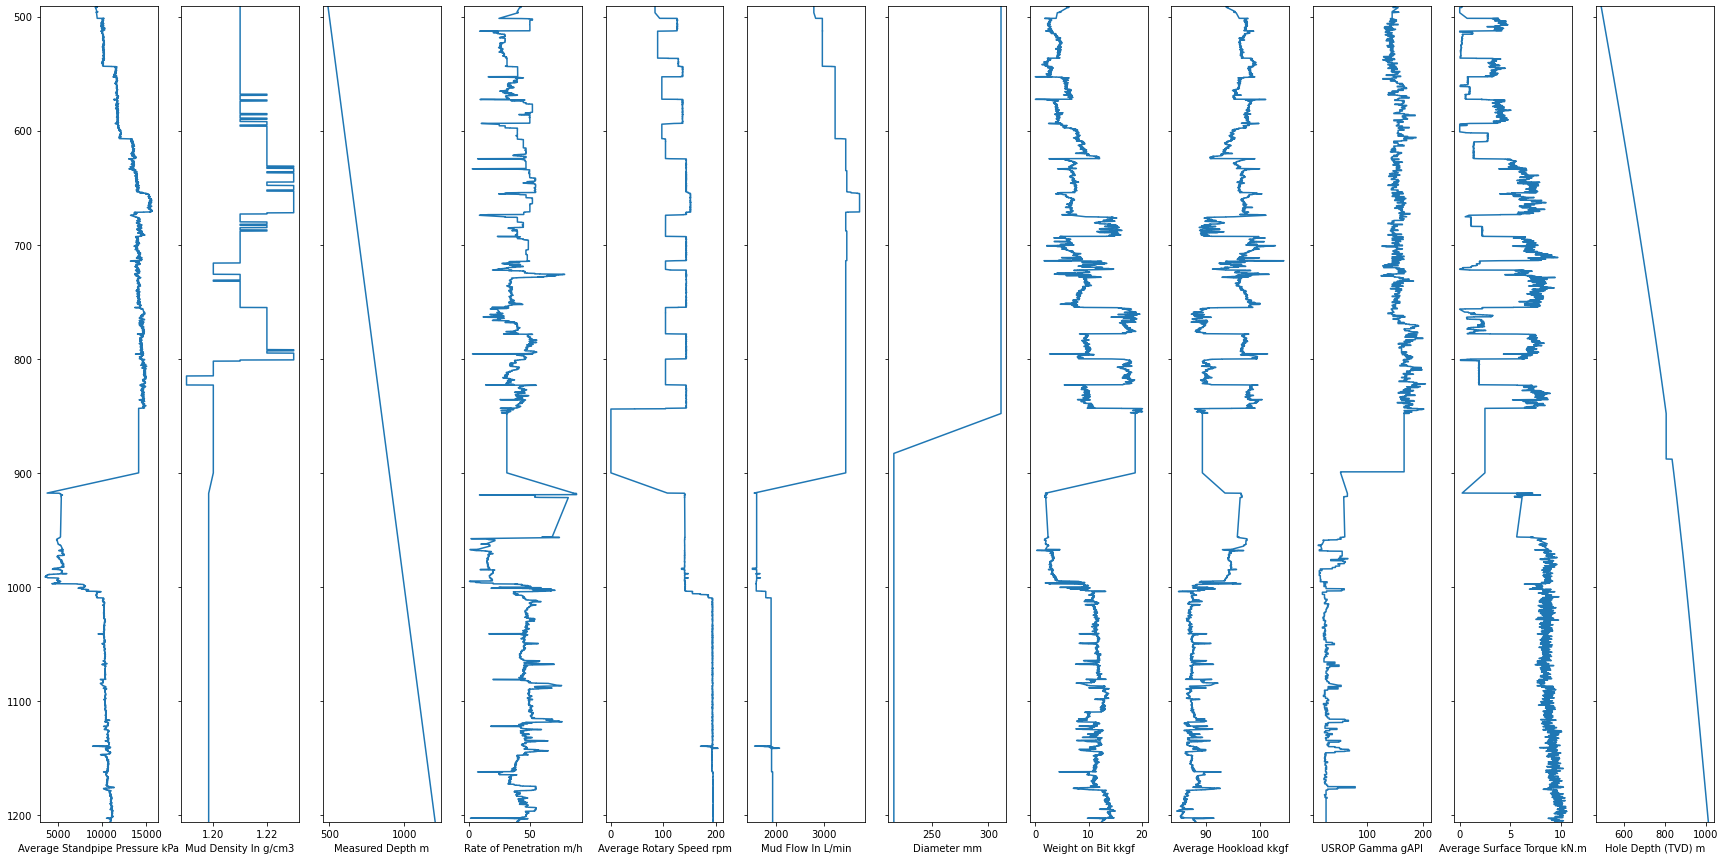

In [10]:
well_data = data[data['Well Identifier'] == wells[0]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

(633.536, 301.231)

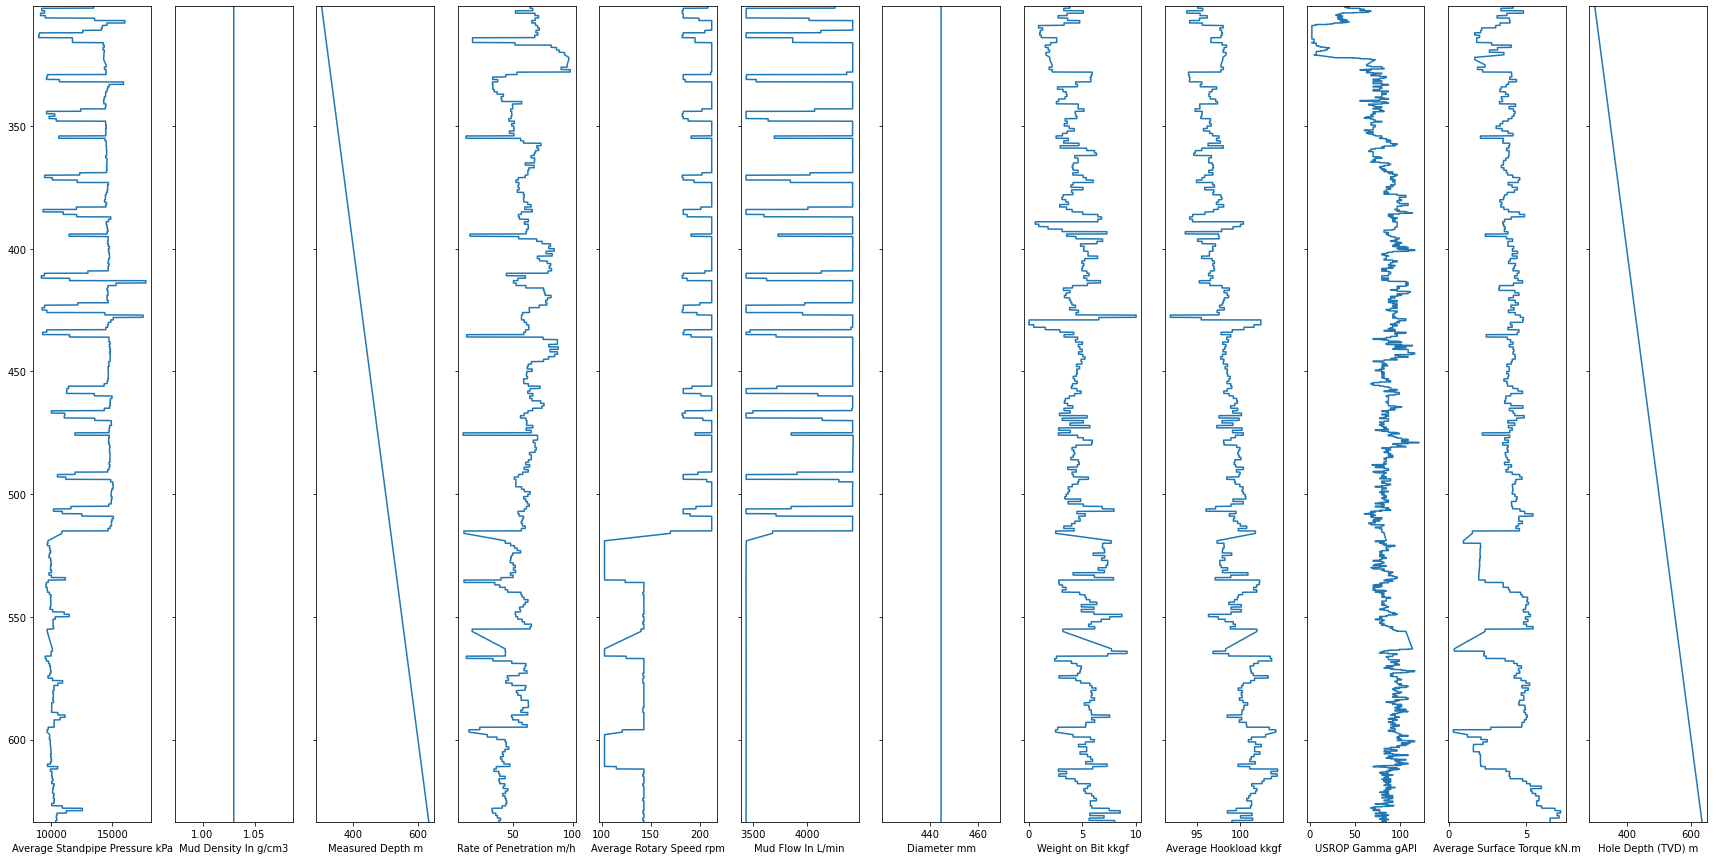

In [11]:
well_data = data[data['Well Identifier'] == wells[1]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

In [12]:
well_data.columns

Index(['Well Identifier', 'Measured Depth m', 'Weight on Bit kkgf',
       'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
       'Rate of Penetration m/h', 'Average Rotary Speed rpm',
       'Mud Flow In L/min', 'Mud Density In g/cm3', 'Diameter mm',
       'Average Hookload kkgf', 'Hole Depth (TVD) m', 'USROP Gamma gAPI'],
      dtype='object')

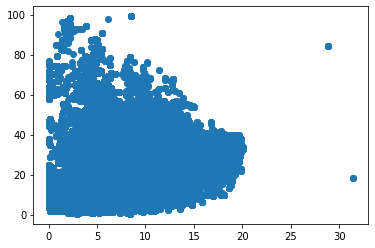

In [13]:
# check if there's any co-linearity between features
# you may check this for all of the features and see if there's any good finding. 
plt.scatter(data['Weight on Bit kkgf'], data['Rate of Penetration m/h'])

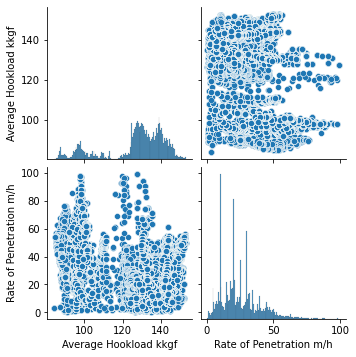

In [14]:
# another library from Seaborn to check the co-linearity
sb.pairplot(data[['Average Hookload kkgf', 'Rate of Penetration m/h']])

# **5. Build Machine Learning Models**

#### Preparing data for training

In [15]:
X = data.drop(columns=['Well Identifier', 'Rate of Penetration m/h', 'Average Standpipe Pressure kPa','Mud Density In g/cm3','Diameter mm','Average Hookload kkgf'])

In [16]:
y = data['Rate of Penetration m/h']

####Shuffle the data


In [17]:
X, y = shuffle(X, y, random_state=42)

In [18]:
X

,Measured Depth m,Weight on Bit kkgf,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Hole Depth (TVD) m,USROP Gamma gAPI
95319,2886.816,11.920407,22.303205,139.736,2121.382739,2645.491178,7.350
99368,3024.293,6.128940,23.271259,139.736,2121.378954,2733.591790,14.002
131291,2012.594,5.333116,11.600000,124.140,3987.855834,1906.749552,103.520
162157,3748.516,3.304420,17.475138,179.505,1705.918630,2945.014786,57.565
97546,2966.128,3.889101,21.763590,139.736,2121.378954,2697.390998,9.994
...,...,...,...,...,...,...,...
119879,4014.792,16.772031,32.389135,139.736,2077.184268,3150.273506,67.673
103694,3170.837,1.850657,16.283374,139.736,2121.382739,2810.914978,27.000
131932,2058.619,5.863368,11.270001,140.000,3987.855834,1946.937432,85.330
146867,3062.280,8.187342,11.876965,234.380,2016.072577,2654.130125,9.370


####Scale the features

In [19]:
scaler = StandardScaler()

In [20]:
X.columns

Index(['Measured Depth m', 'Weight on Bit kkgf', 'Average Surface Torque kN.m',
       'Average Rotary Speed rpm', 'Mud Flow In L/min', 'Hole Depth (TVD) m',
       'USROP Gamma gAPI'],
      dtype='object')

In [21]:
X = scaler.fit_transform(X)

#### Split into train and test data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Example prediction on open test dataset

In [23]:
model = RandomForestRegressor(n_estimators=50, random_state=42)

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

####Test model

In [25]:
y_pred_test = model.predict(X_test)

In [26]:
mean_absolute_error(y_test.values, y_pred_test)

0.11539802273180456

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model2 = LinearRegression().fit(X_train, y_train)
y_pred_test2 = model2.predict(X_test)
mean_absolute_error(y_test.values, y_pred_test2)

9.621307862193232